<a href="https://colab.research.google.com/drive/1wmTK0fKIG2lTXa8YLrebhzQ4-2fkEgpf?authuser=1" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BA810: Supervised Machine Learning

## Professor Dr. Nachiketa Sahoo

### Group Project

### Team 1: Bennett Blanco, Camila Daza, Sofia Lopez-Somohano, Jose Salerno

## Species Survival Forecast: Analyzing Extinction Risks with Machine Learning




**Problem Definition**

Our team has identified a fascinating gap in the market, a previously unexplored avenue for leveraging the power of machine learning to predict the risk factors contributing to species extinction. We aim to analyze the relationship between species data, environmental factors, and climate-related variables to understand their interplay and potential impact on species survival and extinction.

**Why Does It Matter?**

By successfully creating this predictive model, this analysis could offer insights into how environmental changes and disasters affect different species, potentially influencing conservation efforts and policy-making. We hope to empower countries and regions worldwide to take proactive measures to protect their fauna and flora. Our goal is to enable informed decision-making and inspire preventive initiatives to safeguard the biodiversity of our beloved Earth. By empowering these nations to address climate change proactively, we aim to uncover the impacts of corporate contributions to the rising levels of greenhouse emissions. This would enable the respective government to enforce stricter penalties on these companies, serving them to prevent further damage to their ecosystems and biodiversity. Furthermore, this project has the potential to shed light on the critical issues of species extinction and lay the groundwork for future research and conservation efforts using machine learning methodologies. We are passionate about making a change in our ever-changing world and generating a positive impact on our environment. Together, we can work toward more sustainability and coexistence with the natural world.

**Data Sources and Description of Data**

To accomplish this goal, we first dive deep into the biodiversity factors of over 90,000 species, gaining a comprehensive understanding of their habitats. We gathered this data from The [*World Bank Global Species Database*](https://datacatalog.worldbank.org/search/dataset/0063384/Global%20Species%20Database?version=2), which includes the variable we aim to predict, ‘iucn_category’ or [*IUCN Red List*](https://www.iucnredlist.org) Categories. The categories include Data Deficient (DD), Least Concern (LC), Near Threatened (NT), Vulnerable (VU), Endangered (EN), and Critically Endangered (CR). We have decided to drop DD as it does not give valuable information to predict categories. Other information in The *World Bank* dataset includes species name, group, species range, and country.
Furthermore, we gathered data on crucial environmental factors from The World Bank’s Climate Knowledge Portal and the International Monetary Fund, such as annual surface temperature changes, frequency of climate-related disasters, population density, and precipitation.  Finally, we collected data from the Emissions Database for [*Global Atmospheric Research (EDGAR)*](https://edgar.jrc.ec.europa.eu/emissions_data_and_maps) to access Global Greenhouse gas (GHG) emissions information for every country. This enables us to conduct a more comprehensive analysis of our data, leading to improved recommendations for each country's government.
After combining and cleaning these two datasets into a new dataset titled ‘species,’ we have over 250,000 entries and 19 columns in the dataset. The dataset contains a mixture of numerical (float, int) and categorical (object) variables, allowing us to better understand the causes of IUCN Red List Categories.

**Link to API scripts**

The link to the API scripts for building the dataset are located on the following [repository](https://github.com/jbblancojr/endangered_species)

| Variable Name                    | Description                                                                             |
|-----------------------------------|-----------------------------------------------------------------------------------------|
| Group                             | Animal grouping                                                                        |
| Animal Type                       | Type of animal                                                                         |
| IUCN Category                     | Risk level for an animal (LC = Least Concern, NT = Near Threatened, VU = Vulnerable, EN = Endangered, CR = Critically Endangered) |
| Total Area (sq. km)               | Total species range area                                                               |
| Small Range (1/0)                 | 1 = Yes, 0 = No (total area less than 25 sq. km)                                       |
| Inhabited Area within Country (sq. km) | Total species range area within the country                                           |
| DataNam Pct Area                  | Percent of total species range area within the country                                 |
| Surface Temperature Change        | Annual surface temperature change in the country from 2021 to 2022                     |
| Climate Disasters Frequency (2022)| Total natural disasters that occurred in the country in 2022                           |
| Population Density (2022)         | Population density in the country in 2022                                              |
| Change in Precipitation           | Change in annual precipitation in the country from 2021 to 2022                         |
| GHG Emissions (2022)              | Total Greenhouse Gas Emissions in 2022                                                 |


## Prerequisites

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## For mounting to google drive and running in colab
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount = True)
# species = pd.read_csv('/content/gdrive/MyDrive/BA810-GroupProj/learning_set_w_GHG.csv')

# For running in VertexAI with higher compute
species = pd.read_csv('learning_set_w_GHG.csv')

## Exploratory Data Analysis (EDA)

Through our initial exploration, we corroborated the expectations of our dataset, which consists primarily of animals and plants in the Least Concern IUCN category, with over 200,000 entries falling into this category. Furthermore, we saw that the most frequent countries in our dataset include the USA, India, and Australia, while the most endangered animal groups in our data sets include Salt Water Fish, IUCN Plants, and Mammals.

In [83]:
species.head()

,Unnamed: 0.1,Unnamed: 0,group,binomial,iucn_id_no,common_name,name_language,iucn_category,iso_a3,total_area,...,"Climate related disasters frequency, Number of Disasters: Drought","Climate related disasters frequency, Number of Disasters: Extreme temperature","Climate related disasters frequency, Number of Disasters: Flood","Climate related disasters frequency, Number of Disasters: Landslide","Climate related disasters frequency, Number of Disasters: Storm","Climate related disasters frequency, Number of Disasters: TOTAL","Climate related disasters frequency, Number of Disasters: Wildfire",Population Density,Change in Precipitation,GHG emissions
0,0,0,Amphibians,Abavorana luctuosa,125161167.0,Purple Frog,eng,LC,IDN,128005.5600,...,NaN,NaN,13.0,NaN,NaN,13.0,NaN,95.4,-58.41,1240.832611
1,1,271,Amphibians,Alcalus baluensis,79935161.0,Balu Eastern Frog,eng,LC,IDN,240233.7000,...,NaN,NaN,13.0,NaN,NaN,13.0,NaN,95.4,-58.41,1240.832611
2,2,274,Amphibians,Alcalus rajae,42863256.0,King Dwarf Mountain Frog,eng,NT,IDN,2237.9141,...,NaN,NaN,13.0,NaN,NaN,13.0,NaN,95.4,-58.41,1240.832611
3,3,922,Amphibians,Ansonia albomaculata,54464.0,Whitebelly Stream Toad,eng,LC,IDN,93643.3750,...,NaN,NaN,13.0,NaN,NaN,13.0,NaN,95.4,-58.41,1240.832611
4,4,927,Amphibians,Ansonia glandulosa,54467.0,Kodok-langsing,ind,LC,IDN,1058.8936,...,NaN,NaN,13.0,NaN,NaN,13.0,NaN,95.4,-58.41,1240.832611


In [84]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517655 entries, 0 to 517654
Data columns (total 26 columns):
 #   Column                                                                         Non-Null Count   Dtype  
---  ------                                                                         --------------   -----  
 0   Unnamed: 0.1                                                                   517655 non-null  int64  
 1   Unnamed: 0                                                                     517655 non-null  int64  
 2   group                                                                          517655 non-null  object 
 3   binomial                                                                       517655 non-null  object 
 4   iucn_id_no                                                                     256612 non-null  float64
 5   common_name                                                                    216991 non-null  object 
 6   name_languag

### Data Cleaning

Given that this dataset was constructed for this project, there are a fair amount of null values. Some of these can be imputed as 0 because null is a placeholder, but the rest will be dropped. Also, columns pulled from the world bank API were loaded in as objects, so those to be converted. Otherwise the dataset is clean. Lastly, we dropped irrelevant columns to conduct a cleaner analysis. For example, we only kept total climate disasters, as each on its own would not have enough variance.

In [85]:
# Drop irrelevant columns
columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'binomial', 'iso_a3', 'wb_datanam', 'wb_iso', 'Climate related disasters frequency, Number of Disasters: Wildfire',
                   'Climate related disasters frequency, Number of Disasters: Flood', 'Climate related disasters frequency, Number of Disasters: Landslide',
                   'Climate related disasters frequency, Number of Disasters: Extreme temperature', 'Climate related disasters frequency, Number of Disasters: Drought',
                   'Climate related disasters frequency, Number of Disasters: Storm', 'common_name', 'name_language', 'iucn_id_no'
                   ]

species = species.drop(columns=columns_to_drop)

# Drop rows with iucn_category = 'DD' (Data Deficient)
species = species[species['iucn_category'] != 'DD']

# Drop blank rows
species.dropna(subset=['iucn_category'], inplace=True)
species.dropna(subset=['Population Density'], inplace=True)

In [86]:
# Convert 'population_density' and 'change_precipitation' to numeric using astype
species['Population Density'] = pd.to_numeric(species['Population Density'], errors='coerce')
species['Change in Precipitation'] = pd.to_numeric(species['Change in Precipitation'], errors='coerce')

In [87]:
# Filling NaNs that can be imputed (where nan actually means 0)
species['Change in Precipitation'].fillna(0, inplace = True)
species['Surface Temperature Change'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: TOTAL'].fillna(0, inplace=True)

species.dropna(inplace=True)

In [88]:
species.rename(inplace=True, columns={'Inhabited Area within Country': 'area_in_country', 'datanam_pct_area': 'pct_area',
                                      'Surface Temperature Change': 'chg_surface_temp', 'Population Density': 'pop_density',
                                      'Change in Precipitation': 'chg_precipitation', 'GHG emissions': 'ghg'})

species['num_natural_disasters'] = species['Climate related disasters frequency, Number of Disasters: TOTAL']
species.drop(columns=['Climate related disasters frequency, Number of Disasters: TOTAL'], inplace=True)

In [89]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408806 entries, 0 to 517506
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   group                  408806 non-null  object 
 1   iucn_category          408806 non-null  object 
 2   total_area             408806 non-null  float64
 3   small_range            408806 non-null  int64  
 4   area_in_country        408806 non-null  float64
 5   pct_area               408806 non-null  float64
 6   chg_surface_temp       408806 non-null  float64
 7   pop_density            408806 non-null  float64
 8   chg_precipitation      408806 non-null  float64
 9   ghg                    408806 non-null  float64
 10  num_natural_disasters  408806 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 37.4+ MB


### Visualizations and Initial Insights

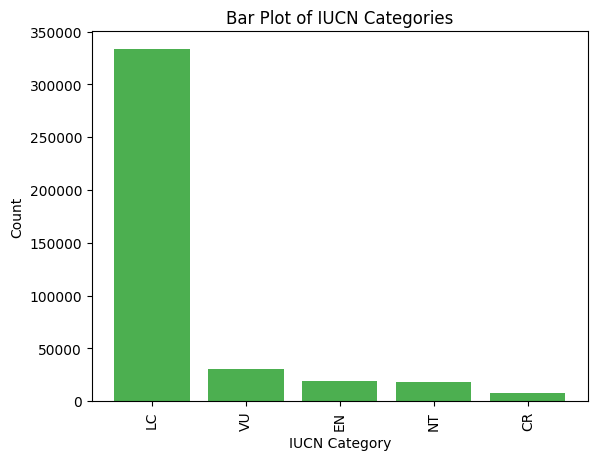

In [90]:
green_palette = [
    "#4CAF50", "#64DD17", "#81C784", "#AED581", "#C5E1A5",
    "#DCE775", "#E8F5E9", "#B9F6CA", "#69F0AE", "#00E676",
    "#00C853", "#00BFA5", "#00B8D4", "#00ACC1", "#00897B"
]


# Set the color palette
sns.set_palette(green_palette)

category_counts = species['iucn_category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('IUCN Category')
plt.ylabel('Count')
plt.title('Bar Plot of IUCN Categories')
plt.xticks(rotation=90)
plt.show()

In [91]:
classes = species['iucn_category'].value_counts().rename_axis('unique_values').reset_index(name='counts')
classes['percentage'] = round(classes['counts'] / sum(classes['counts']), 2) * 100
classes

,unique_values,counts,percentage
0,LC,333386,82.0
1,VU,30482,7.0
2,EN,19502,5.0
3,NT,18003,4.0
4,CR,7433,2.0


We actually are seeing moderate class imbalance (1-20%) in all of our categories outside of Least Concern (LC). We will need to find a way to combat this so that any model procuded is not biased towards the majority class. Let's assign weights using inverse frequency.

In [92]:
total_samples = sum(classes['counts'])

cws = {'LC': total_samples / 333386,
       'VU': total_samples / 30482,
       'EN': total_samples / 19502,
       'NT': total_samples / 18003,
       'CR': total_samples / 7433
       }

e_cws = {0: total_samples / 333386,
         1: total_samples / 30482,
         2: total_samples / 19502,
         3: total_samples / 18003,
         4: total_samples / 7433
         }

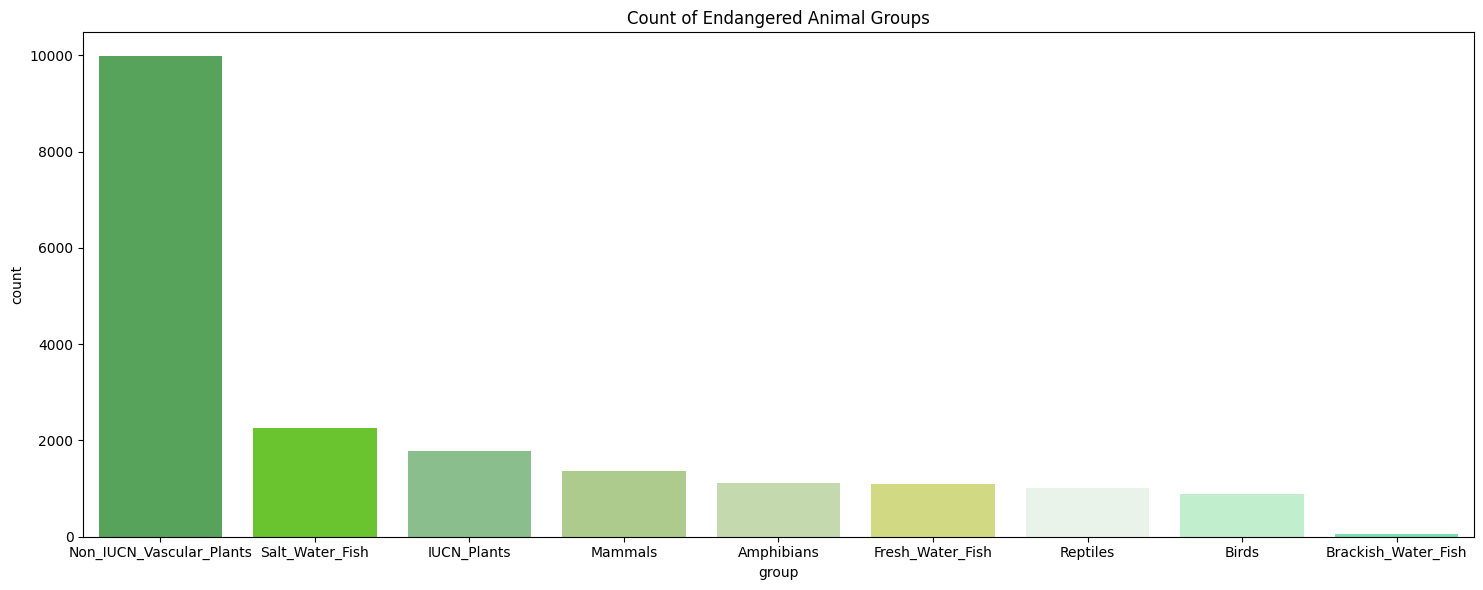

In [93]:
# Filter the dataset for Endangered animals
en_data = species[species['iucn_category'] == 'EN']

# Create a countplot for the Endagered animal groups
plt.figure(figsize=(15, 6))
sns.countplot(x='group', data=en_data, order=en_data['group'].value_counts().index)
plt.title('Count of Endangered Animal Groups')
plt.tight_layout()
plt.show()

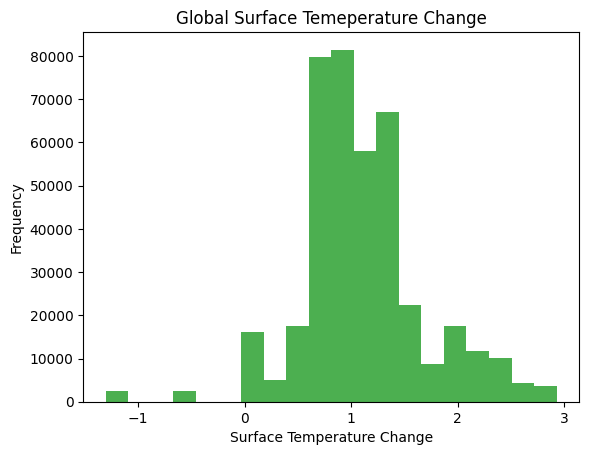

In [94]:
plt.hist(species['chg_surface_temp'], bins = 20)
plt.xlabel('Surface Temperature Change')
plt.ylabel('Frequency')
plt.title('Global Surface Temeperature Change')
plt.show()

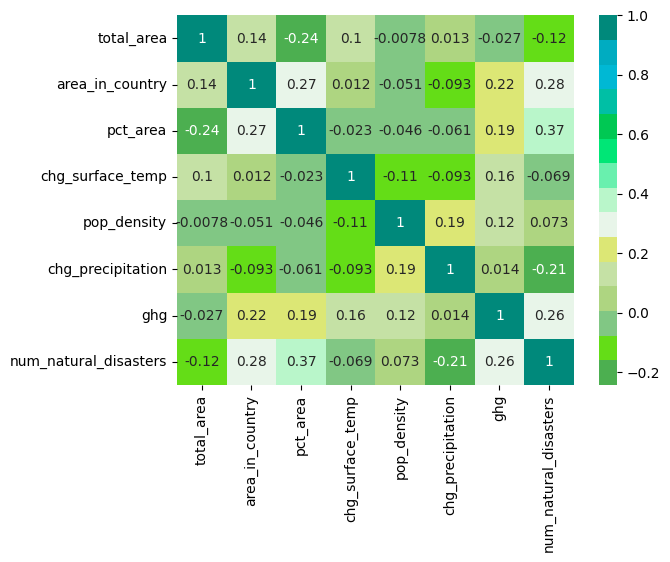

In [95]:
corr = species[['total_area', 'area_in_country', 'pct_area', 'chg_surface_temp', 'pop_density', 'chg_precipitation', 'ghg', 'num_natural_disasters']].corr()

sns.heatmap(data=corr, cmap=sns.color_palette(green_palette), annot=True);

## Creating Pipeline

### Data Transformations

We have numerical and categorical features, which requires subsetting the columns into `nums` and `cats`. Numericals will be standardized and scaled, and as good practice, we will impute with the mean (this is to ensure the pipeline works on future data). For Categoricals, we will also impute by the mode. Additionally we need to OneHotEncode our dummies, and convert data types for objects that came through the API.

In [96]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

nums = ['total_area', 'area_in_country', 'pct_area', 'chg_surface_temp', 'num_natural_disasters', 'pop_density', 'chg_precipitation']
cats = ['group', 'small_range']

num_fix = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

cat_fix = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('string_converter', FunctionTransformer(lambda x: x.astype(str), validate=False)),
    ('dummies', OneHotEncoder(handle_unknown='ignore'))
])


In [97]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[
    ('numeric columns', num_fix, nums),
    ('categorical columns', cat_fix, cats)],
    remainder='passthrough'
)


### Individual Model Pipelines

Each model takes the same preprocessor and fits its classifier accordingly.

In [98]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

!pip install xgboost
from xgboost import XGBClassifier

linearSVC_pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', svm.LinearSVC(random_state=7, max_iter=10000, dual=True, class_weight=cws))
])

lr_pipeline = Pipeline([
    ('preprocessor', preprocessing),
    ('model', LogisticRegression(random_state=7,class_weight=cws))
])


rf_pipeline = Pipeline([
    ('preprocessor', preprocessing),
    ('classifier', RandomForestClassifier(random_state=7, class_weight=cws))
])

xgbc_pipeline = Pipeline([
    ('preprocessor', preprocessing),
    ('classifier', XGBClassifier(random_state=7, class_weight=e_cws))
])

gnb_pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', GaussianNB())
])

## Feature Matrix and Target Vector (Splitting the Data)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

## for testing code (saves compute)
# species_subset = species[:2000]
# X = species_subset.drop(columns=['iucn_category'])
# y = species_subset['iucn_category']

# Feature Matrix
X = species.drop(columns=['iucn_category'])

# Predictor Vector
y = species['iucn_category']

f1_scorer = make_scorer(f1_score, average='macro')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=7)

# For XGBC
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test_encoded = LabelEncoder().fit_transform(y_test)

## Hyperparameter Tuning

We initially tried Grid, Randomized, and Bayes Search. Ultimately, Grid didn't fit the scope of the project and Bayes didn't deliver higher results. In the end, we opted to RandomizedSearch for the best hyperparameters for each model.

### Helper Functions

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

!pip install scikit-optimize
from skopt import BayesSearchCV

# Takes parameters grids (list of dictionaries) & strategy (model_selection Class) & models (a list of the models to try)
# returns a search method model
def searcher(params: list, models: list, strategy: str):
  import warnings
  warnings.filterwarnings("ignore")

  # search models are appended here and will be returned in final result
  results = []

  if strategy == 'grid':
    for model, param in zip(models, params):
      result = GridSearchCV(model, param_grid=param, cv=5, scoring=f1_scorer)

      # just a check to see if XGBC is inside 'model'. easier and cleaner than keeping a counter
      if any(isinstance(step[1], XGBClassifier) for step in model.steps):
        result.fit(X_train, y_train_encoded)
        results.append(result)
      else:
        result.fit(X_train, y_train)
        results.append(result)

  elif strategy == 'random':
    for model, param in zip(models, params):
      result = RandomizedSearchCV(model, param_distributions=param, cv=5, n_iter=10, scoring=f1_scorer)

      if any(isinstance(step[1], XGBClassifier) for step in model.steps):
        result.fit(X_train, y_train_encoded)
        results.append(result)
      else:
        result.fit(X_train, y_train)
        results.append(result)

  else:
    for model, param in zip(models, params):
      result = BayesSearchCV(model, search_spaces=param, cv=5, scoring=f1_scorer)

      if any(isinstance(step[1], XGBClassifier) for step in model.steps):
        result.fit(X_train, y_train_encoded)
        results.append(result)
      else:
        result.fit(X_train, y_train)
        results.append(result)

  # models_list will always be in this order, change if needed

  keys = ['lr', 'rf', 'xgbc', 'gnb']

  for result, model in zip(results, keys):
    print(f'Pipeline: {model}')
    print('Best Params: ', result.best_params_)
    print('Best Score: ', result.best_score_)
    print()

  results_dict = {key: result.best_params_ for key, result in zip(keys, results)}

  return results_dict

In [101]:
models_list = [lr_pipeline, rf_pipeline, xgbc_pipeline, gnb_pipeline]

### Getting Parameters

The cell below will provide the string variables that you need to manipulate model parameters inside the pipeline. Use this for debugging purposes and further tuning.

In [103]:
linearSVC_pipeline.get_params()
lr_pipeline.get_params()
rf_pipeline.get_params()
xgbc_pipeline.get_params()
gnb_pipeline.get_params()

### Random Search

In [25]:
from scipy.stats import randint
from scipy.stats import uniform

lr_param_dist = {
    'model__penalty': ['l1', 'l2'],
    'model__C': randint(low=1, high=50),
    'model__solver': ['saga', 'lbfgs']
    }

rf_param_dist = {
    'classifier__n_estimators': randint(10,50),
    'classifier__max_depth': randint(1,20),
    }

xgbc_param_dist = {'classifier__min_child_weight': np.arange(1, 11, 1),
                   'classifier__max_depth': np.arange(3, 11, 1,),
                   'classifier__eta': [.01, .02]
                   }

gnb_param_dist = {
   'classifier__var_smoothing': uniform(1e-9, 1e-6)
}

rand_params = [lr_param_dist, rf_param_dist, xgbc_param_dist, gnb_param_dist]

rand_results = searcher(rand_params, models_list, 'random')

Pipeline: lr
Best Params:  {'model__C': 13, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best Score:  0.229881227005942

Pipeline: rf
Best Params:  {'classifier__max_depth': 18, 'classifier__n_estimators': 22}
Best Score:  0.37858650300507823

Pipeline: xgbc
Best Params:  {'classifier__min_child_weight': 3, 'classifier__max_depth': 9, 'classifier__eta': 0.02}
Best Score:  0.35293230357348016

Pipeline: gnb
Best Params:  {'classifier__var_smoothing': 6.585903699397598e-09}
Best Score:  0.2674927782612596



### Bayes Search

Bayes was not utilized, but is here as an alternative.

In [34]:
from skopt.space import Integer

lr_param_space = {
    # 'model__penalty': ['l1', 'l2'],
    'model__C': Integer(1, 50),
    'model__solver': ['saga', 'lbfgs']
    }

rf_param_space = {
    'classifier__n_estimators': (10,50),
    'classifier__max_depth': (1,20)
    }

xgbc_param_space = {
    'classifier__max_depth': (5, 20),
    'classifier__min_child_weight': (3, 11),
    }

gnb_param_space = {
    'classifier__var_smoothing': (1e-9, 1e-6)
}

bayes_params = [lr_param_space, rf_param_space, xgbc_param_space, gnb_param_space]

bayes_results = searcher(bayes_params, models_list, 'bayes')

Pipeline: lr
Best Params:  OrderedDict([('model__C', 32), ('model__solver', 'lbfgs')])
Best Score:  0.1808147560583499

Pipeline: rf
Best Params:  OrderedDict([('classifier__max_depth', 10), ('classifier__n_estimators', 23)])
Best Score:  0.33008673046450865

Pipeline: xgbc
Best Params:  OrderedDict([('classifier__max_depth', 10), ('classifier__min_child_weight', 3)])
Best Score:  0.2991522527361504

Pipeline: gnb
Best Params:  OrderedDict([('classifier__var_smoothing', 9.36143762441074e-07)])
Best Score:  0.15875757570670435



## Best Models & Visualizing Results

Moving forward, we can now check the performance of each individual model on the test set. Results will be visualized through Confusion Matricies and the ROC Curve

In [26]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, ConfusionMatrixDisplay

### Making the Data Binary for Evaluation (OvR)

Since the task is multi-class classification we need to make some manipulations to the data so that we can evaluate with ROC (which can only handle binary classification). We decided to utilize One-versus-rest, with the One being Least Concern (LC) and the rest being all further risk levels. This intuitively makes sense, given each sequential category implies at least some level of risk.

In [27]:
from sklearn.preprocessing import LabelBinarizer

# Creating an instance of the LabelBinarizer and fitting it
label_binarizer = LabelBinarizer().fit(y_train)
encoded_label_binzarizer = LabelBinarizer().fit(y_train_encoded)

y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test_encoded = encoded_label_binzarizer.transform(y_test_encoded)


class_id = np.flatnonzero(label_binarizer.classes_ == 'LC')[0]

### ROC Plot Funciton

In [31]:
from sklearn.metrics import RocCurveDisplay

def plot_roc(pipeline):
  if isinstance(pipeline, VotingClassifier):
    RocCurveDisplay.from_predictions(
          y_onehot_test_encoded[:, class_id],
          pipeline.predict_proba(X_test)[:, class_id],
          name="LC vs the rest",
          color="blue"
    )

  elif any(isinstance(step[1], XGBClassifier) for step in pipeline.steps):
    RocCurveDisplay.from_predictions(
          y_onehot_test_encoded[:, class_id],
          pipeline.predict_proba(X_test)[:, class_id],
          name="LC vs the rest",
          color="blue"
    )

  else:
      RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        pipeline.predict_proba(X_test)[:, class_id],
        name="LC vs the rest",
        color="blue"
    )

  plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
  plt.axis("square")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("One-vs-Rest ROC curve:\nLC vs (CR, EN, VU, NT)")
  plt.legend(loc="lower right")
  plt.show()

### Logistic Regression with Tuned Hyperparameters

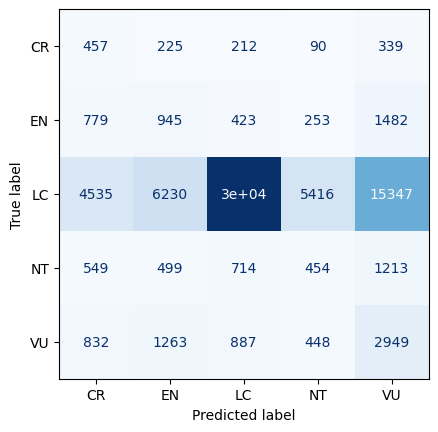

In [32]:
lr_pipeline.set_params(**rand_results['lr'])

lr_pipeline.named_steps['model'].set_params(class_weight=cws)

best_lr = lr_pipeline.fit(X_train, y_train)

lr_y_pred = best_lr.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, lr_y_pred, cmap=plt.cm.Blues, colorbar=False)

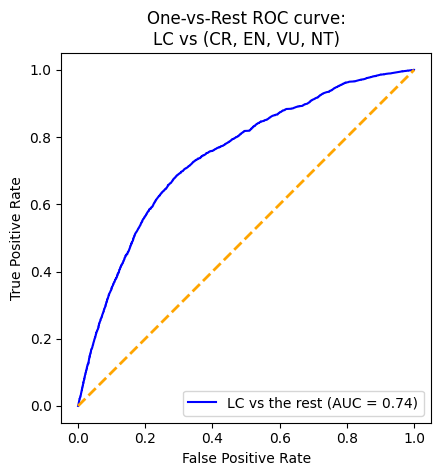

In [33]:
plot_roc(lr_pipeline)

### Random Forest with Tuned Hyperparameters

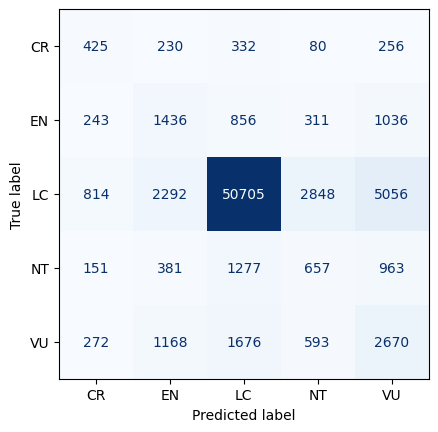

In [34]:
rf_pipeline.set_params(**rand_results['rf'])

rf_pipeline.named_steps['classifier'].set_params(class_weight=cws)

best_rf = rf_pipeline.fit(X_train, y_train)

rf_y_pred = best_rf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, cmap=plt.cm.Blues, colorbar=False)

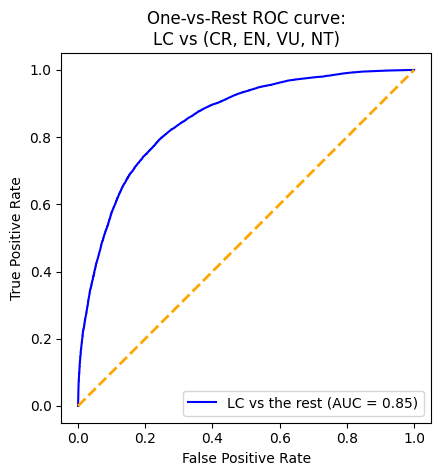

In [35]:
plot_roc(rf_pipeline)

### XGBoost Classifier with Tuned Hyperparameters

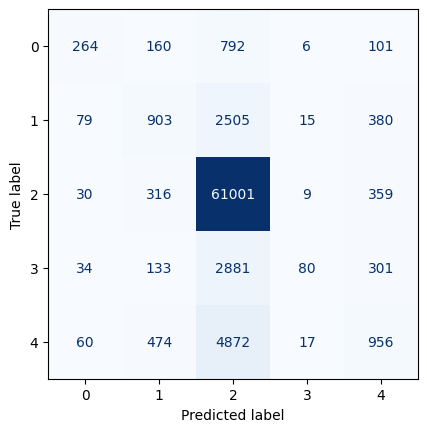

In [36]:
xgbc_pipeline.set_params(**rand_results['xgbc'])

best_xgbc = xgbc_pipeline.fit(X_train, y_train_encoded)

xgbc_y_pred = best_xgbc.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test_encoded, xgbc_y_pred, cmap=plt.cm.Blues, colorbar=False)

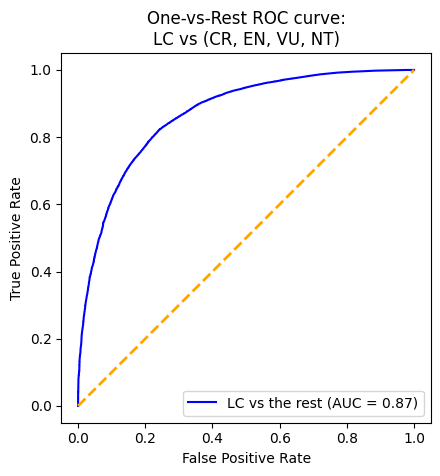

In [37]:
plot_roc(xgbc_pipeline)

### Gaussian Naive Bayes with Tuned Hyperparameters

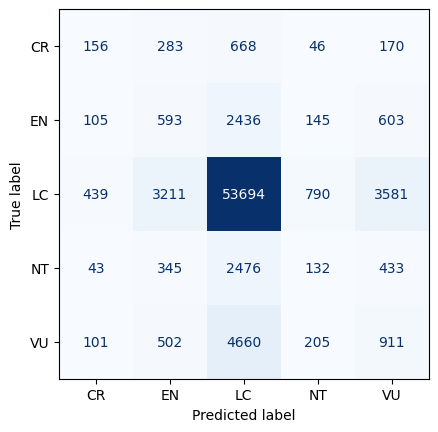

In [38]:
gnb_pipeline.set_params(**rand_results['gnb'])

# gnb_pipeline.named_steps['classifier'].set_params(class_weight=cws)

best_gnb = gnb_pipeline.fit(X_train, y_train)

gnb_y_pred = best_gnb.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, gnb_y_pred, cmap=plt.cm.Blues, colorbar=False)

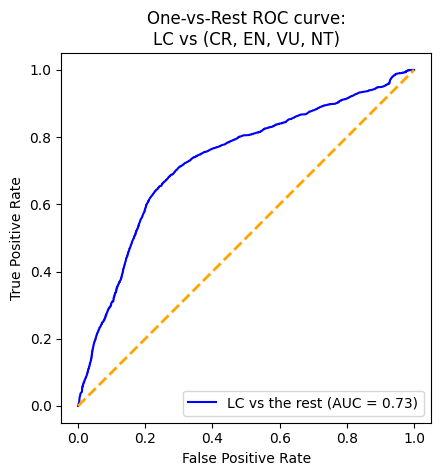

In [40]:
plot_roc(gnb_pipeline)

### Best Performing Individual Model (Random Forest):

With an AUC (Area Under the Curve) value of 0.87, the XGBoost model demonstrates the strongest performance in distinguishing between positive and negative instances. To delve deeper into its performance, we will analyze the output of its confusion matrix. As our model is a multi-class classifier, the confusion matrix differs from the traditional binary version. Diagonal elements indicate correct predictions, while off-diagonal elements represent misclassifications. Specifically, the model correctly predicted 264 instances of CR, 903 instances of EN, 61,001 instances of LC, 80 instances of NT, and 956 instances of VU. Notably, there are more correctly predicted species in the LC category. However, it is also important to point out that there is also a higher misclassification rate among animals predicted as LC when they are not. 

Overall, the XGBoost model performs well, but excels particularly in classifying LC, likely influenced by class imbalance.

## Voting Classifier

Given that the two highest performing individual models are Random Forest and XGBoost (which tend to overfit to noise), it makes sense to utilize Voting here to try and make our predictions more robust.

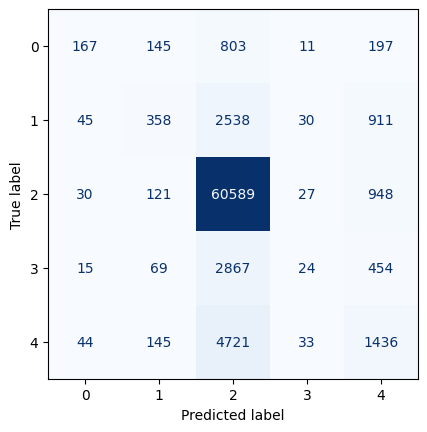

In [41]:
# fill these with the best results we get (test will get replaced)
lr_pipeline.set_params(**rand_results['lr'])
rf_pipeline.set_params(**rand_results['rf'])
xgbc_pipeline.set_params(**rand_results['xgbc'])
gnb_pipeline.set_params(**rand_results['gnb'])

# convert to label_encoded class weights
lr_pipeline.named_steps['model'].set_params(class_weight=e_cws)
rf_pipeline.named_steps['classifier'].set_params(class_weight=e_cws)
# gnb_pipeline.named_steps['classifier'].set_params(class_weight=e_cws)

voter = VotingClassifier(estimators=[
    ('lr', lr_pipeline),
    ('rfc', rf_pipeline),
    ('xgbc', xgbc_pipeline),
    ('gnb', gnb_pipeline)],
    voting='soft'      # so we can look at ROC (need to be able to evaluate predicted_proba)
    )

voter.fit(X_train, y_train_encoded)
vc_y_pred = voter.predict(X_test)
classification_report(y_test_encoded, vc_y_pred)

cmd = ConfusionMatrixDisplay.from_predictions(y_test_encoded, vc_y_pred, cmap=plt.cm.Blues, colorbar=False)

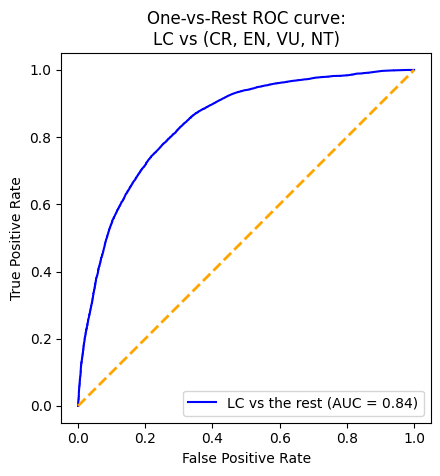

In [42]:
plot_roc(voter)

## Stacking ROCs

In [45]:
from sklearn.metrics import roc_auc_score

# ChatGPT scaled our individual model ROC function for all models.
def plot_roc(pipelines, X_test, y_test_encoded, class_id):
    plt.figure(figsize=(8, 8))

    model_names = ['Logistic Regression', 'Random Forest', 'XGBoost Classifier', 'Gaussian Naive Bayes', 'Voting Classifier']

    # Iterate through each pipeline
    for i, pipeline in enumerate(pipelines):
        if isinstance(pipeline, VotingClassifier):
            y_pred_proba = pipeline.predict_proba(X_test)[:, class_id]
        elif any(isinstance(step[1], XGBClassifier) for step in pipeline.steps):
            y_pred_proba = pipeline.predict_proba(X_test)[:, class_id]
        else:
            y_pred_proba = pipeline.predict_proba(X_test)[:, class_id]

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test_encoded[:, class_id], y_pred_proba)

        # Calculate AUC and F1
        auc_value = roc_auc_score(y_test_encoded[:, class_id], y_pred_proba)

        # Plot ROC curve using RocCurveDisplay
        plt.plot(fpr, tpr, label=f"{model_names[i]} (AUC = {auc_value:.2f})")

    plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curve:\nLC vs (CR, EN, VU, NT)")
    plt.legend(loc="lower right")
    plt.show()

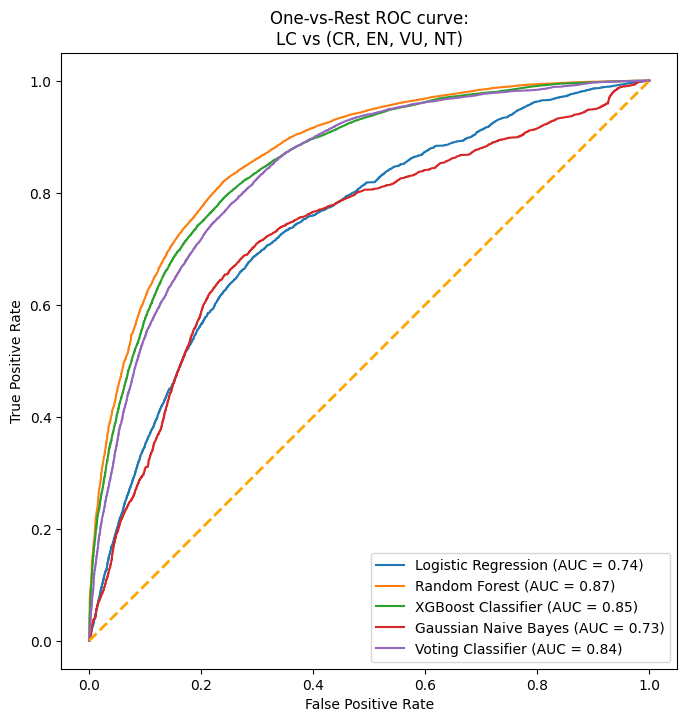

In [46]:
pipelines = [lr_pipeline, xgbc_pipeline, rf_pipeline, gnb_pipeline, voter]
f1s = plot_roc(pipelines, X_test, y_onehot_test_encoded, class_id)

**Conclusion**

After conducting a thorough analysis of four different models - Random Forest, Logistic Regression, Gradient Boost, and Naive Bayes - we discovered that the two models that performed the best were Random Forest and Gradient Boost. To ensure that our final prediction was as accurate as possible, we decided to create an ensemble voting model to mitigate the possibility of overfitting. This technique allowed us to combine the strengths of both models and generate more precise insights. 

To conclude our analysis, we implemented a stacked ROC curve with all the models utilized. The area under the curve for our voting classifier was around 0.84, which indicates how well our model is able to differentiate between the two classes - whether a species is at high risk of endangerment or least concern. This result is a testament to the effectiveness of our approach and the accuracy of our final prediction.

**Interpretting a high AUC but low F1**

It is important to remember that F1 score is calculated based on a threshold (which by default here is .5). So at the current threshold, our F1 is low across all models and the VotingClassifier. However, we have a reasonable AUC of around .80 for most models. Since AUC is a point-wise metric and ROC is calculated across all thresholds, this coupled with the low F1 score suggested that there is room for improvement by adjusting the threshold.

## Business Value

Our model goes beyond serving the immediate needs of this project; it presents an unprecedented opportunity in the uncharted territory of predicting animal extinction and stands out as a strategic investment from a business perspective. We propose establishing a consultancy service tailored for governments, positioning itself as a crucial element in informed and effective policy-making utilizing our predictive model. We would charge a fee to the government, and possibly other entities, to use our model and help them create policies.

We would work with policymakers, evaluating existing policies, identifying gaps, and proposing data-driven strategies for improvement. For instance, by analyzing variables like GHG emissions in our dataset, we can directly correlate them with animal IUCN categories in the client country, recommending tailored policies. Our consultancy service extends beyond data interpretation to the implementation phase, providing guidance on monitoring and evaluating policy outcomes for continuous refinement. By bridging the gap between data science and governance, we aim to assist governments in crafting policies that are effective in helping the countries' fauna at a fee.

## Limitations

**Limitations**

The goal of trying to predict whether or not a species is at risk for extenction is very complex and difficult to predict. It's important to understand that the complexity of this problem is a huge limitation to the study.

Another limitation to our study was the size of our data. Since we have 200k rows, all of our models need to be linear. We ran into this issue when trying to implement non-linear SVM (poly and rbf). Since the time complexity for SVM prediction is O($n^2$), it was out of scope. In the same context, grid search takes immense amoutns of time due to the size of the dataset.

Another limitation was time constratins. If we had more time, we would have performed an under-sampling of the majority class to accurately weigh the different classifications. This would have allowed us to better understand the differences between the classifications and make more informed decisions. 

**Biggest Challenge Overcame**

While there were a lot of challenges and limitations, one big feat was that we were able to utilize LabelBinarizer to bring our multi-class problem into binary context. This allowed for test evaluation in the form of ROC curves.

## Conclusion

**Conclusion**

After conducting a thorough analysis of four different models - Random Forest, Logistic Regression, Gradient Boost, and Naive Bayes - we discovered that the two models that performed the best were Random Forest and Gradient Boost. To ensure that our final prediction was as accurate as possible, we decided to create an ensemble voting model to mitigate the possibility of overfitting. This technique allowed us to combine the strengths of both models and generate more precise insights. 

To conclude our analysis, we implemented a stacked ROC curve with all the models utilized. The area under the curve for our voting classifier was around 0.84, which indicates how well our model is able to differentiate between the two classes - whether a species is at high risk of endangerment or least concern. This result is a testament to the effectiveness of our approach and the accuracy of our final prediction.

**Interpretting a high AUC but low F1**

It is important to remember that F1 score is calculated based on a threshold (which by default here is .5). So at the current threshold, our F1 is low across all models and the VotingClassifier. However, we have a reasonable AUC of around .80 for most models. Since AUC is a point-wise metric and ROC is calculated across all thresholds, this coupled with the low F1 score suggested that there is room for improvement by adjusting the threshold.

**What can be put to Practice?**

An important piece of this project is the utilization of ensemble methods such as the voting classifier. Since we used indiviudal models that are prone to overfitting such as XGBoost and Random Forest, the ensemble method helps make our predictions more robust. This is a great example of leveraging ensemble methods to enhance weak learners and our results emphasizes its value and applicability in the real world. Additionally we were faced with high class imbalance, which required trying various methods such as inverse frequency and manipulating the class_weight parameter in our models to improve results. This is likely to be an issue that will be present in other real world data, in which we now have practiced methods to overcome such a challenge.

## References

**Sources**
- (World Bank)[https://datacatalog.worldbank.org/search/dataset/0063384/Global%20Species%20Database?version=2]
- (EDGAR)[https://edgar.jrc.ec.europa.eu/emissions_data_and_maps]
- (IUCN)[https://www.iucnredlist.org]
- (Interpreting low F1 and high AUC)[https://stackoverflow.com/questions/34698161/how-to-interpret-almost-perfect-accuracy-and-auc-roc-but-zero-f1-score-precisio]
- (Multiclass ROC)[https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html]
- Inclass Labs
- ChatGPT for scaling the ROC plot function


In [108]:
!jupyter nbconvert --to html save_the_frogs.ipynb

usage: jupyter-nbconvert [-h] [--debug] [--show-config] [--show-config-json]
                         [--generate-config] [-y] [--execute] [--allow-errors]
                         [--stdin] [--stdout] [--inplace] [--clear-output]
                         [--no-prompt] [--no-input]
                         [--allow-chromium-download]
                         [--disable-chromium-sandbox] [--show-input]
                         [--embed-images] [--sanitize-html]
                         [--log-level NbConvertApp.log_level]
                         [--config NbConvertApp.config_file]
                         [--to NbConvertApp.export_format]
                         [--template TemplateExporter.template_name]
                         [--template-file TemplateExporter.template_file]
                         [--theme HTMLExporter.theme]
                         [--sanitize_html HTMLExporter.sanitize_html]
                         [--writer NbConvertApp.writer_class]
                        